In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

# Constants
DATA_PATH = "../../data/iris_binary.csv"


In [2]:
def read_data(dataPath):
    data = pd.read_csv(DATA_PATH)
    print(data.head())
    return torch.tensor(data.values,dtype=torch.float)


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [4]:
class FirstModel(nn.Module):
    def __init__(self):
        super(FirstModel, self).__init__()
        # first layer: input layer (4 values)
        self.fc1 = nn.Linear(4,4)
        # second layer: output layer layer (4 input values, 1 output layer)
        self.fc2 = nn.Linear(4,1)

    # function for forwarding: must be passed through all layers
    def forward(self, x):

        # input layer - activation:
        #x = torch.sigmoid(self.fc1(x))
        x = self.fc1(x)

        # output layer - activation:
        x = torch.sigmoid(self.fc2(x))

        #print("forwar: return ", x)
        return x


In [5]:

nn.Linear?


Init signature:
nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`(

In [6]:
# read iris data with pandas
from re import I


dataArr = read_data(DATA_PATH)

#print("dataArr: ", dataArr)

# create Model
model = FirstModel()

# select appropriate loss function (BCE loss fits in this case: range 0:1)
loss = nn.BCELoss()

# select optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

numEpochs = 1000

errArr = np.zeros([numEpochs])
#print("errors, shape: ", errArr.shape)
#print("errors, ndim: ", errArr.ndim)

for epoch in range(numEpochs):
    # reset optimizer
    optimizer.zero_grad()

    # select data
    X = dataArr[:,0:4]
    #print("X: ", X)
    y = dataArr[:,4]
    y = y.view(y.shape[0], 1)

    modelOut = model(X)

    #print("Model:\n", modelOut)
    #print("model dictionary: \n", model.state_dict())
    #print("Shape(y): ", y.shape)
    error = loss(modelOut, y)

    #print("Error: ", error)

    # back propagation to improve weights
    error.backward()

    # optimize weights and bias
    optimizer.step()

    # store error and weight for visualization later
    errArr[epoch] = error


   sepal length  sepal width  petal length  petal width  class
0           6.1          2.8           4.7          1.2      1
1           6.0          3.0           4.8          1.8      1
2           6.1          2.8           4.0          1.3      1
3           4.4          3.2           1.3          0.2      0
4           5.5          3.5           1.3          0.2      0


Text(0, 0.5, 'Error')

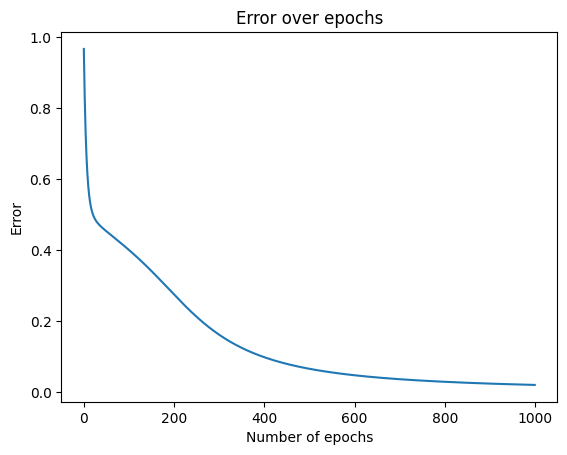

In [12]:
# +++ Visualization +++
plt.plot(errArr)
plt.title("Error over epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Error")


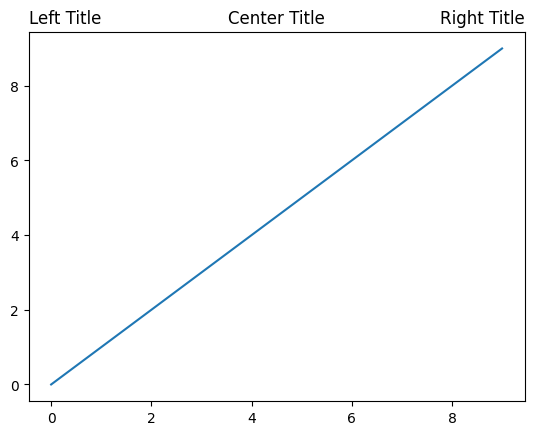

In [ ]:
plt.plot(range(10))
plt.title("AAA")
plt.title("Center Title")
plt.title("Left Title", loc="left")
plt.title("Right Title", loc="right")

plt.show()
